# Problem

Real estate is changing. Deep learning is leading the way to many new methods of determing how to price a property at a competitive rate. Traditionally, when a seller is ready to put a property on the market, they would contact an agent to start the process. In recent times, this process has changed; we now have iBuyers in the market that can harness the details (They ask sellers fill out a short form online or accept a call to answer questions about your home features, updates and condition, photos to make you the seller a compepetitive cash offer).  
Real estate is complex. Multiple of levels of complexity e.g transactions, additions, updates. Zingat operates as an intermediary between potential buyers and sellers in the real estate market. In this regard, to help both parties they routinely value and monitor real estate market. For this purpose, They regularly build new and better models using new technologies in the field of data science. Not only with automated valuation models that predict house prices, they also employ time series models to understand market trends. 
Zingat has made available a public dataset on kaggle (https://www.kaggle.com/zingatbi/zingat-real-estate) to build our version of a basic Automated Valuation Model. We will use modern methods to predict the price of a property using core principles of Comparable Market Analysis (our basic assumption is that a competitve offer price is a price at which similar or comparable properties in the same area recently sold).
Based on this assumption we will introduce the idea of merging multiple statistical models to output an offer amount for a property. 
We will test these model restricted set of future data to glean the effectiveness of our generalizations. This side project is inspired by the wonderful white paper from Kristoffer Birkeland and Allan Daniel D'Silva from the Norwegian Univeristy of Science and Technology.
The dataset we are using in this project covers Turkey. However, the accuracy of these ensemble models will be extended to other locations via service API to benchmark it against real estate brokers and the Zestimate. 


# Domain History 

The use of data science in econometrics has enormous potential. Traditional methods used historically to predict in this domain 
include K-means, Least Squares, complex regressions e.t.c 
Some more modern approaches include ensemble learning (finite set of alternative models) and Artifical Neural Networks (Kaggle is a great resource for this). 
These methods having popualrized by big time iBuyers like Zillow which publishes the awesome Zestimate (https://www.zillow.com/how-much-is-my-home-worth)
The value of an AVM in real estate is a positive since it can be useful for anyone involved in the buisness (useful for fair competition). 
As mentioned a great solution (take for example the Zestimate) should be flexible, multi-input (home prices, seller provided details, external details e.t.c).


# Preprocessing Data

We will begin by mapping out our data by location (focusing on address)


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
print(os.listdir('../Zingat-Property-Automated-Valuation-Model'))

['.git', '.ipynb_checkpoints', 'AVM.ipynb', 'README.md', 'real_estate_data.csv']


In [133]:
# reading csv file from url  


data = pd.read_csv('real_estate_data.csv', dtype=object)

In [140]:
data

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency


In [141]:
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 

In [138]:
df

,city,county,district


In [139]:
# new data frame with split value columns  
df = pd.DataFrame(data.address.str.split('/',2).tolist(),
                                 columns = ['city','county','district'])

# Exploaratory Analysis 

In [135]:
#dataset metric 
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 17 columns


In [136]:
#review first 10 rows 
df1.head(10)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000,TRY
5,6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000,TRY
6,7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750,TRY
7,8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000,TRY
8,9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000,TRY
9,10,Konut,Daire,12/26/18,12/26/18,1,0,1,1,Asma Kat,2+2,550.0,İstanbul/Fatih/Sarıdemir,NaN,Fancoil,84256,GBP


In [119]:
#Distribution graphs (histogram/bar graph) of column data
#create funtion to plot
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow): #we have given 3 arguments needed to invoke later
    nunique = df.nunique() 
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df) #use list to hold column names of columns
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow 
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k') #add plot details
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

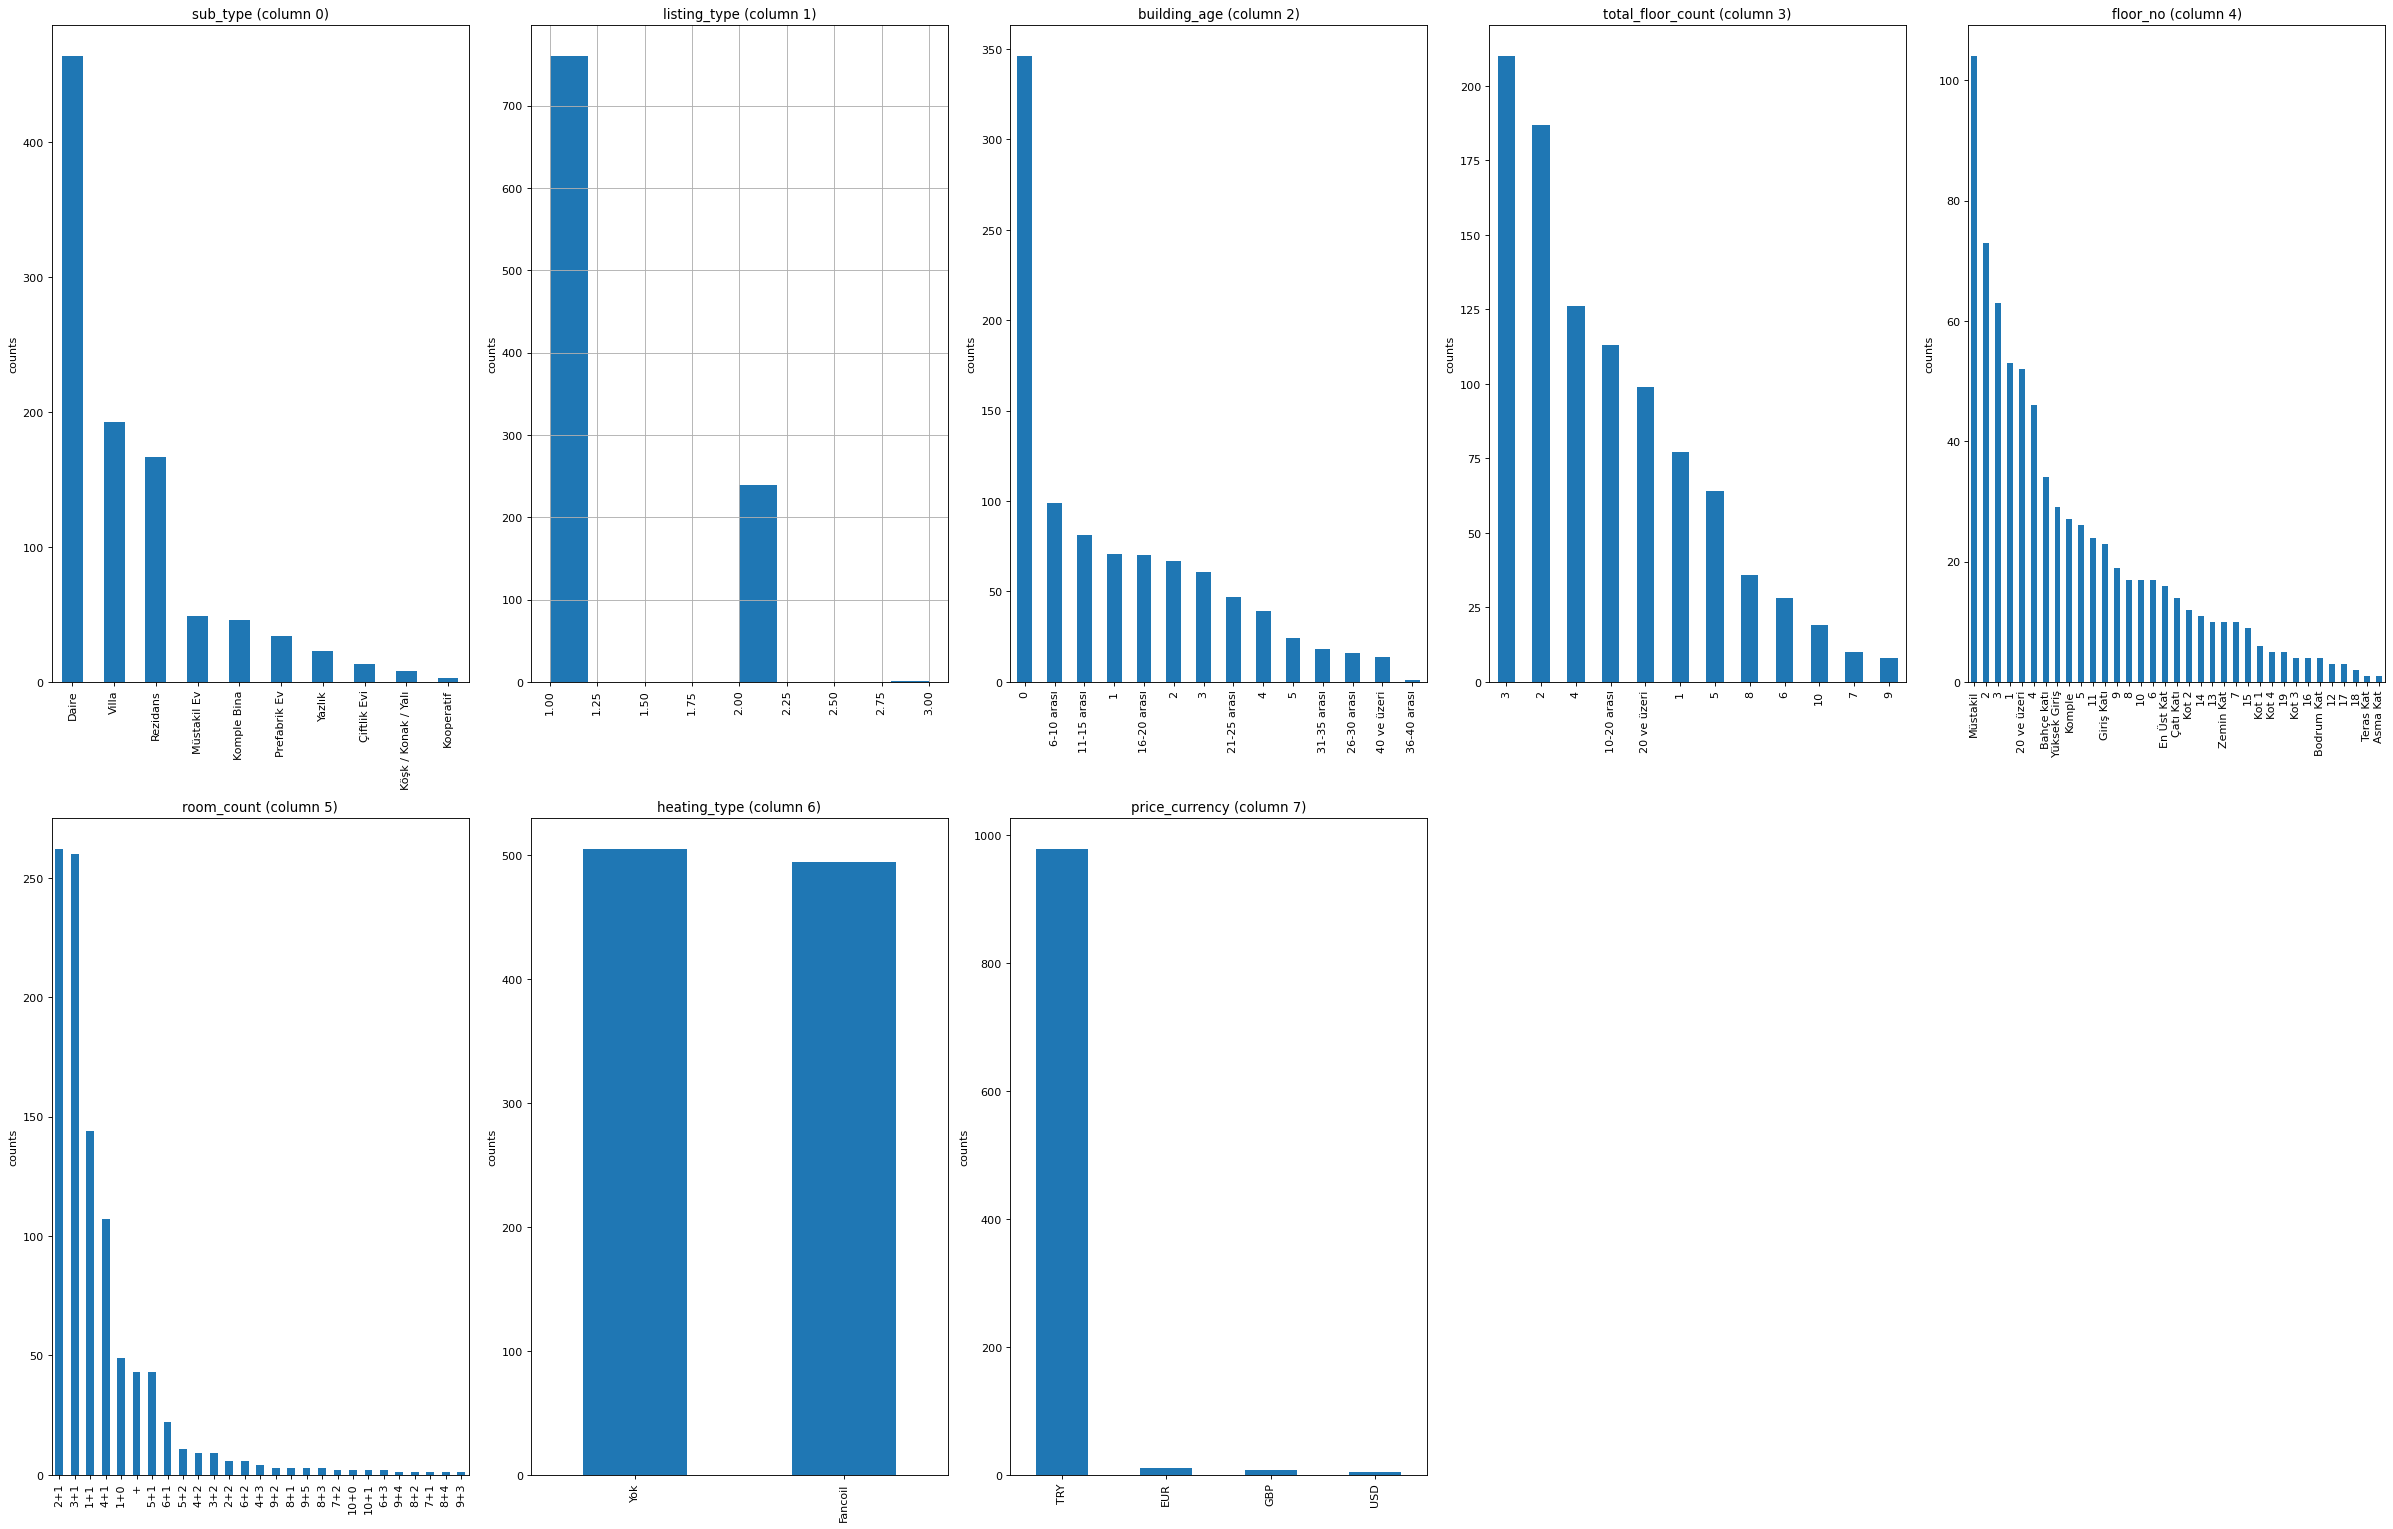

In [120]:
plotPerColumnDistribution(df1, 10, 5)

### Distribution bar graph 

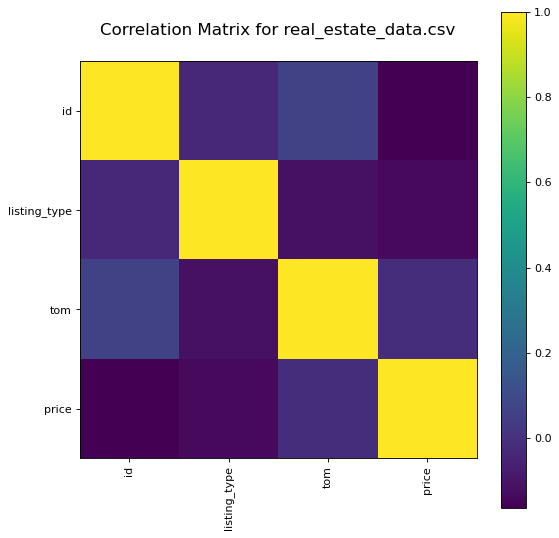

In [121]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(df1, 8)

In [122]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

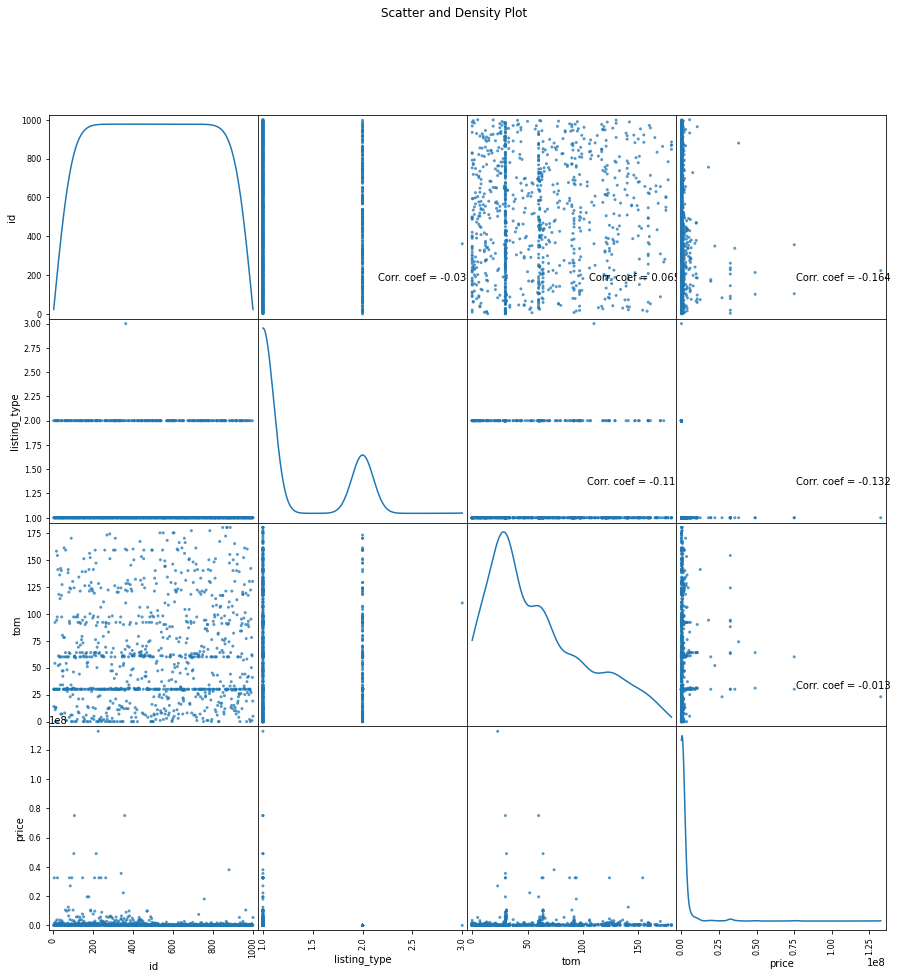

In [123]:
plotScatterMatrix(df1, 15, 10)

In [142]:
df1

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Konut,Daire,10/2/18,12/2/18,1,61,0,5,En Üst Kat,3+1,NaN,İzmir/Seferihisar/Turabiye,NaN,Yok,275000,TRY
996,997,Konut,Müstakil Ev,1/17/19,NaN,2,41,11-15 arası,3,Müstakil,1+1,90.0,Adana/Seyhan/Yeşilyurt,NaN,Yok,700,TRY
997,998,Konut,Villa,10/20/18,NaN,1,130,16-20 arası,3,NaN,3+1,NaN,Balıkesir/Erdek/Sahil,NaN,Yok,425000,TRY
998,999,Konut,Daire,2/8/19,NaN,1,19,0,10-20 arası,3,3+1,108.0,Adana/Sarıçam/Çarkıpare,NaN,Yok,180000,TRY
